In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
torch.set_default_dtype(torch.float64)
import torch.nn as nn
import copy
import random

In [31]:
import config as cfg
from model import DeepNN
from utils import relative_l2, set_seed
from train_reg import train_model_reg
from train_pde import train_model_pde

In [33]:
set_seed(0)
model = DeepNN().to(cfg.device_name)
model = train_model_reg(model, Nfit=300, lr=1e-2)

lbfgs : 0 - ref_rl2 3.0339e-01 
lbfgs : 50 - ref_rl2 1.7568e-04 
lbfgs : 100 - ref_rl2 8.7185e-05 
lbfgs : 150 - ref_rl2 8.6973e-05 
lbfgs : 200 - ref_rl2 8.6959e-05 
lbfgs : 250 - ref_rl2 8.6942e-05 
lbfgs : 299 - ref_rl2 8.6922e-05 


In [36]:
set_seed(50)
model_cur = DeepNN().to(cfg.device_name)
model_cur.load_state_dict(copy.deepcopy(model.state_dict()))
model_cur = train_model_pde(model_cur, Nfit=200, lr=1)

adam : 0 - ref_rl2 8.5053e-05 - pde 1.2321e-03 - lbc 1.5673e-04 - rbc 8.4082e-05 - tbc 5.0229e-03 - bbc 4.8895e-03
adam : 10 - ref_rl2 3.8345e-05 - pde 3.0142e-04 - lbc 2.6283e-05 - rbc 3.6513e-05 - tbc 4.1078e-03 - bbc 4.2970e-03
adam : 20 - ref_rl2 3.4201e-05 - pde 2.4206e-04 - lbc 8.3352e-06 - rbc 1.3158e-05 - tbc 3.8812e-03 - bbc 4.0548e-03
adam : 30 - ref_rl2 3.4691e-05 - pde 2.6083e-04 - lbc 3.6497e-06 - rbc 8.2653e-06 - tbc 3.8106e-03 - bbc 3.9647e-03
adam : 40 - ref_rl2 3.4697e-05 - pde 2.6720e-04 - lbc 2.2350e-06 - rbc 9.7457e-06 - tbc 3.7545e-03 - bbc 3.9010e-03
adam : 50 - ref_rl2 3.1817e-05 - pde 2.2859e-04 - lbc 1.1870e-06 - rbc 1.9133e-05 - tbc 3.6117e-03 - bbc 3.7877e-03
adam : 60 - ref_rl2 3.2140e-05 - pde 2.4663e-04 - lbc 8.9877e-07 - rbc 1.3195e-05 - tbc 3.4904e-03 - bbc 3.7109e-03
adam : 70 - ref_rl2 3.2414e-05 - pde 2.6014e-04 - lbc 1.1381e-06 - rbc 1.1066e-05 - tbc 3.4028e-03 - bbc 3.6283e-03
adam : 80 - ref_rl2 3.4709e-05 - pde 3.1099e-04 - lbc 9.5060e-07 - rbc 1.

In [37]:
X = cfg.X.detach().cpu()
Y = cfg.Y.detach().cpu()
E_reg = model(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_pinn = model_cur(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_ref = cfg.E_ref.cpu()

In [38]:
print('Regression Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_reg)))
print('PINN Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_pinn)))

Regression Solution rl2: 8.6922e-05
PINN Solution rl2: 2.8430e-05


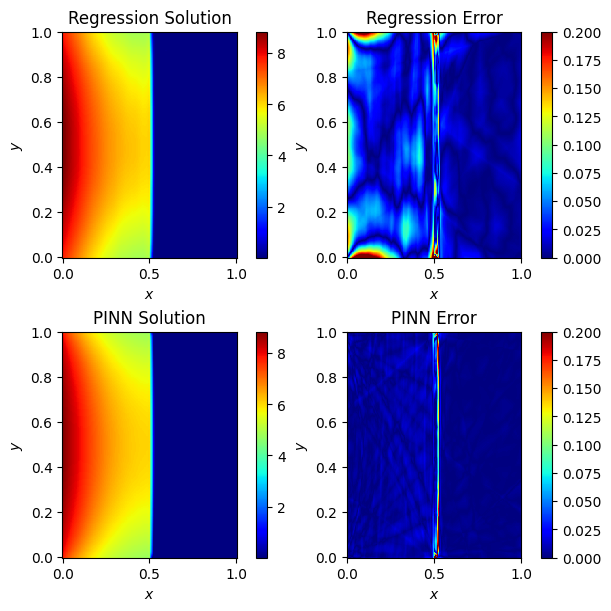

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')

vmin = E_ref.min()
vmax = E_ref.max()

pcm = axs[0][0].pcolormesh(X, Y, E_reg, vmin=vmin, vmax=vmax, cmap='jet')
axs[0][0].set_title("Regression Solution")
axs[0][0].set_xlabel("$x$")
axs[0][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][0])

pcm = axs[0][1].pcolormesh(X, Y, (E_ref - E_reg).abs(), vmin=0, vmax=0.2, cmap='jet')
axs[0][1].set_title("Regression Error")
axs[0][1].set_xlabel("$x$")
axs[0][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][1])

pcm = axs[1][0].pcolormesh(X, Y, E_pinn, vmin=vmin, vmax=vmax, cmap='jet')
axs[1][0].set_title("PINN Solution")
axs[1][0].set_xlabel("$x$")
axs[1][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][0])

pcm = axs[1][1].pcolormesh(X, Y, (E_ref - E_pinn).abs(), vmin=0, vmax=0.2, cmap='jet')
axs[1][1].set_title("PINN Error")
axs[1][1].set_xlabel("$x$")
axs[1][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][1])